# Visualization

### Import necessary packages

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load data

In [74]:
from src.filesystem import get_latest


def prepare_data():
    ## load data
    exp_name = 'optimize'
    latest_file = get_latest(exp_name)
    data_frame = pd.read_csv(latest_file)
    algorithms = ['DBCV','DISCO','Silhouette','DCSI', 'CDBW','CVDD','SDBW']
    time_list = []
    result_list = []
    for algorithm in algorithms:
        for index, row in data_frame.iterrows():
            time_list.append({'Data':row['Data'], 'Algorithm':algorithm, 'Value':row['Time_{}'.format(algorithm)],'Min_Points': row['Min_Points']})
            result_list.append({'Data':row['Data'], 'Algorithm':algorithm, 'Value':row[algorithm],'Min_Points': row['Min_Points']})
    return pd.DataFrame(result_list), pd.DataFrame(time_list)

In [75]:
def plot_results(data_frame):
    data_frame = data_frame.sort_values('Algorithm')
    sns.barplot(data_frame, x='Algorithm', y='Value')

In [76]:
def lineplot(data_frame):
    data_frame = data_frame.sort_values('Algorithm')
    colors = ['#FF1F5B','#ffc61e','#009ade','#00cd6c','#af58ba','#f28522','#a0b1ba']
    fig, ax = plt.subplots(ncols=1,figsize=(20, 6))
    #sns.set(font_scale=3.0)
    palette = sns.color_palette(colors)
    p = sns.lineplot(data=data_frame, x="Min_Points", y="Value", hue="Algorithm",style="Algorithm",palette=palette, lw=5,  dashes= True)
    ax.set_title(data_frame['Data'][0])
    p.set(xlabel='k')
    sns.move_legend(p,loc = 'upper right', bbox_to_anchor=(1,0.95))

In [77]:
res_exp, time_exp = prepare_data()

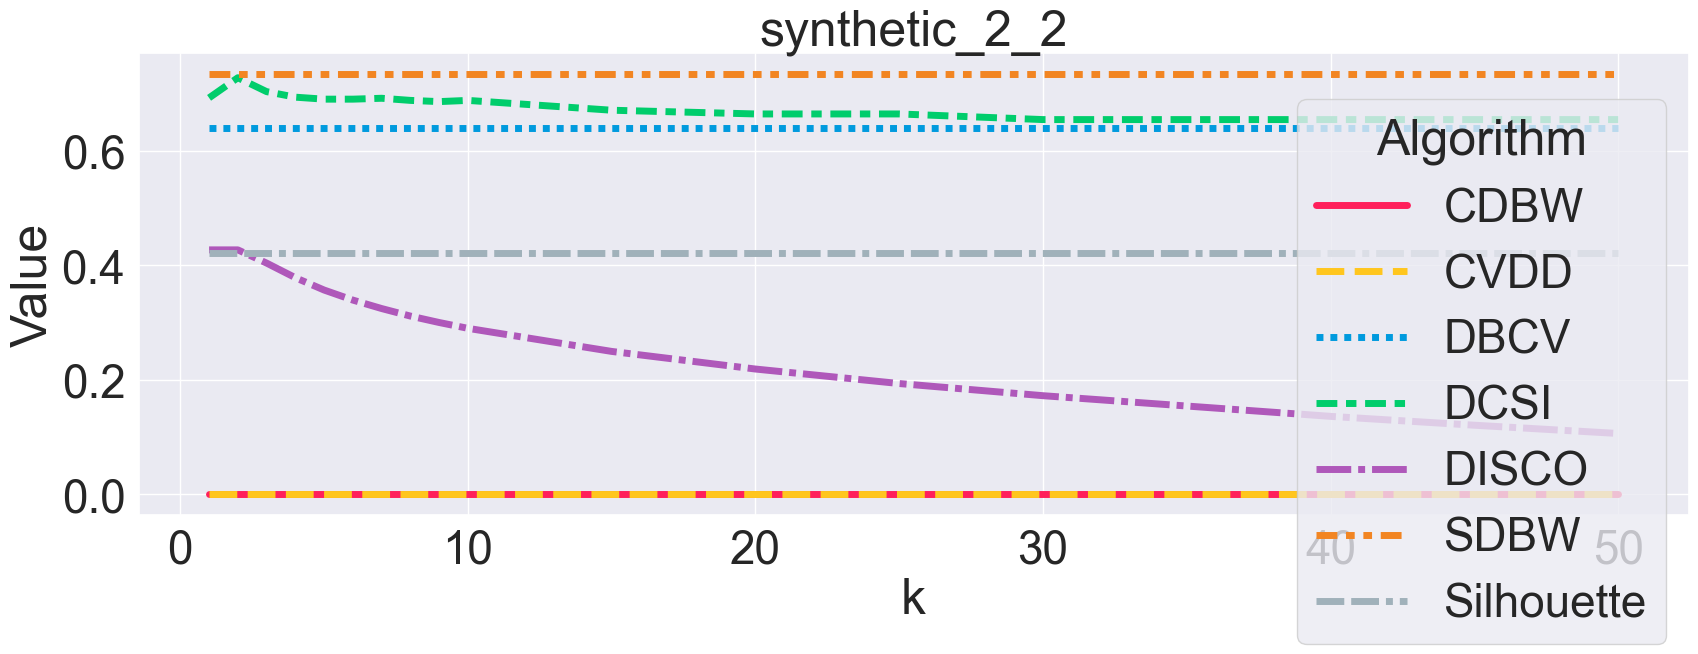

In [78]:
lineplot(res_exp)

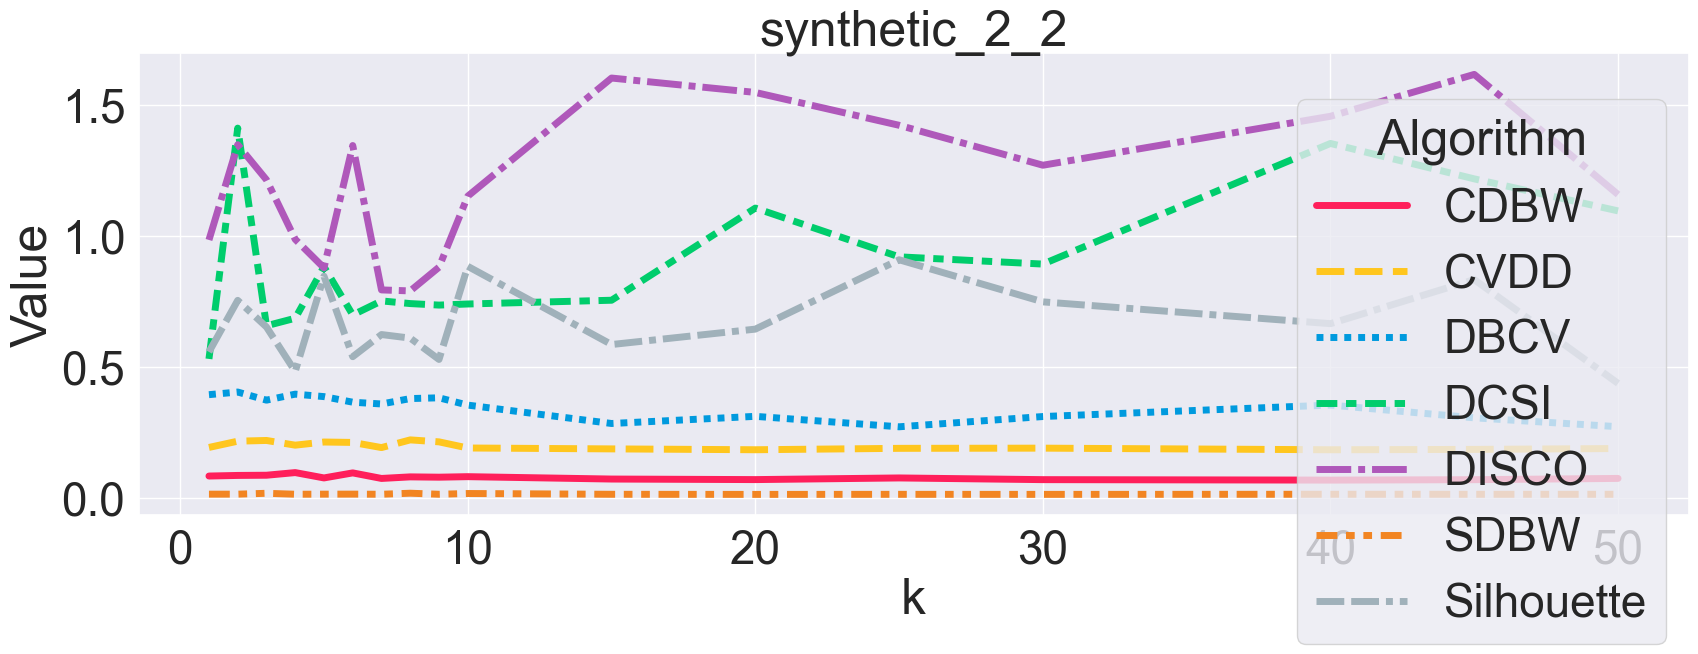

In [79]:
lineplot(time_exp)